In [1]:
from gorillatracker.ssl_pipeline.ssl_config import SSLConfig
from pathlib import Path
import time



ssl_config = SSLConfig(
        tff_selection="equidistant",
        negative_mining="random",
        n_samples=30,
        feature_types=["face_90"],
        min_confidence=0.6,
        min_images_per_tracking=10,
        width_range=(100, None),
        height_range=(100, None),
        split_path=Path(
            "/workspaces/gorillatracker/data/splits/SSL/SSL-Video-Split_2024-04-18_percentage-80-10-10_split.pkl"
        ),
    )


before = time.time()
contrastive_sampler = ssl_config.get_contrastive_sampler(Path("cropped-images/2024-04-18"), "train")
after = time.time()
print(f"Time: {after - before}")
# print(len(contrastive_sampler))
# for i in range(10):
#     contrastive_image = contrastive_sampler[i * 10]
#     print(contrastive_image)
#     print(contrastive_sampler.positive(contrastive_image))
#     print(contrastive_sampler.negative(contrastive_image))


Sampling TrackingFrameFeatures...
Time: 3.059335231781006


Negative Min Distance 17.103115
(318, 303, 3)
(274, 161, 3)
(171, 104, 3)


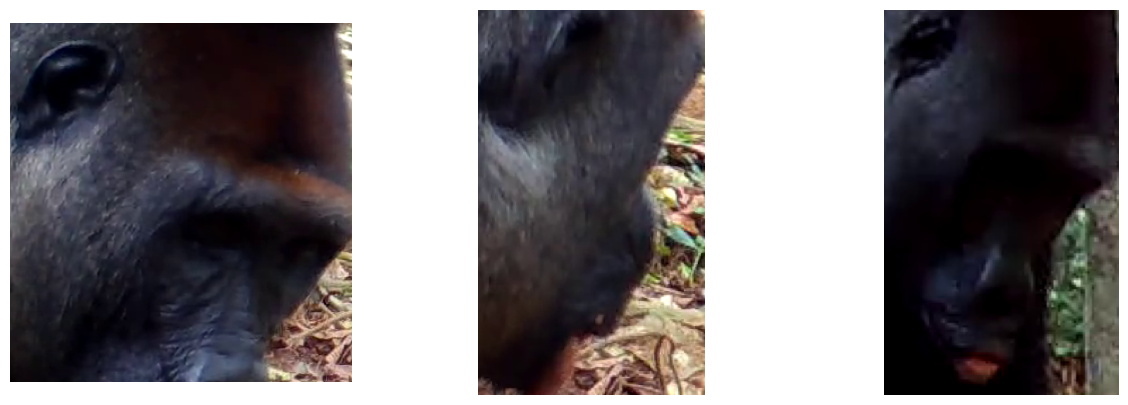

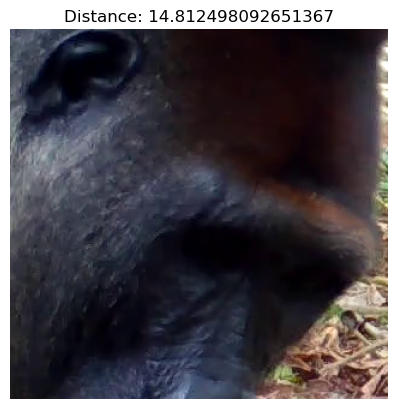

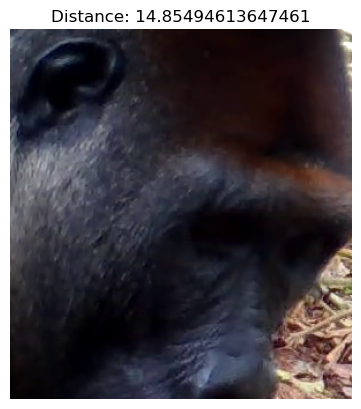

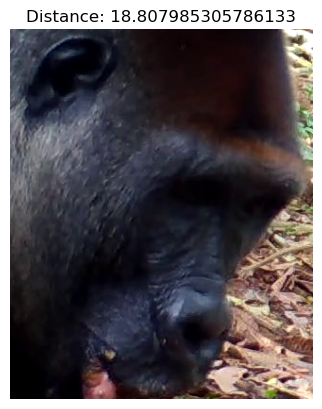

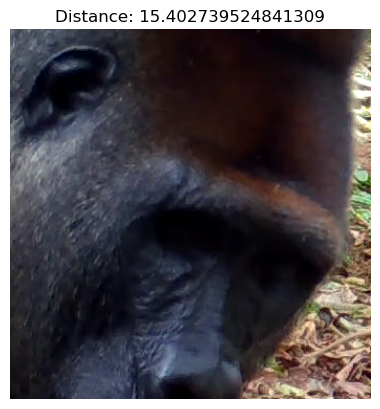

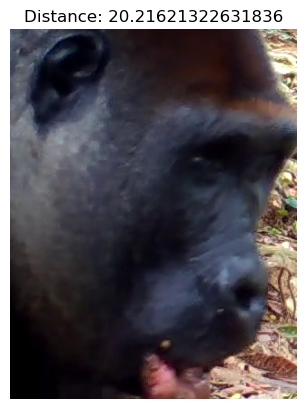

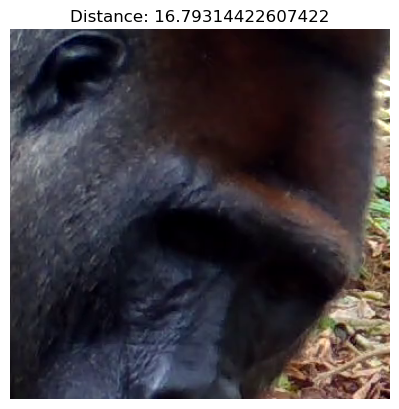

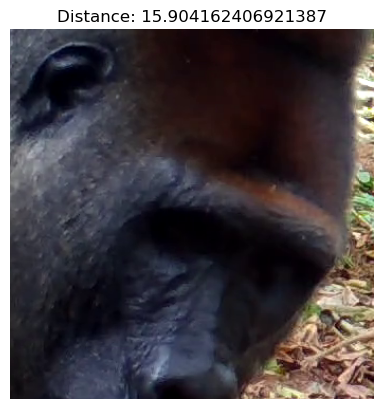

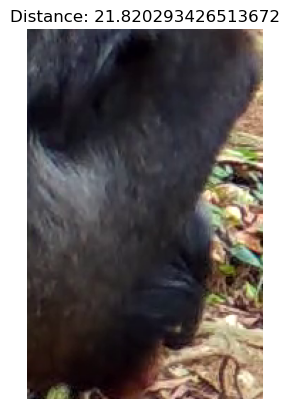

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

contrastive_image = contrastive_sampler[50]
positive = contrastive_sampler.positive(contrastive_image)
negative = contrastive_sampler.negative(contrastive_image)

positives_with_dist = contrastive_sampler.positives_with_dist(contrastive_image)

base = Path("/workspaces/gorillatracker/")
# Load your images
image1 = mpimg.imread(base / contrastive_image.image_path)
image2 = mpimg.imread(base / positive.image_path)
image3 = mpimg.imread(base / negative.image_path)

# # Create a figure to display the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display each image
axes[0].imshow(image1)
axes[0].axis("off")  # Hide axes
axes[1].imshow(image2)
axes[1].axis("off")  # Hide axes
axes[2].imshow(image3)
axes[2].axis("off")  # Hide axes

print(image1.shape)
print(image2.shape)
print(image3.shape)

# Show the plot
plt.show()

i = 0 
for positive, dist in zip(*positives_with_dist):
    image = mpimg.imread(base / positive.image_path)
    plt.imshow(image)
    plt.title(f"Distance: {dist}")
    plt.axis("off")
    plt.show()
    i += 1
    if i == 10:
        break

In [3]:
import numpy as np

array1 = np.array([3, 4, 7])
array2 = np.array([5, 2, 1, 4, 7, 3, 8])

# Create a mask that identifies elements in array2 that are also in array1
mask = np.isin(array2, array1)

# Get the indices that are True in the mask
indices = np.where(mask)[0]

# Map array2 elements to their corresponding positions in array1
order = {val: idx for idx, val in enumerate(array1)}

# Sort indices based on the order of their corresponding values in array1
sorted_indices = indices[np.argsort([order[val] for val in array2[mask]])]

print(sorted_indices)  # Output: [3 4]

[5 3 4]
